# Final Project

Bu notebook MP1–MP5 aşamalarını içermektedir.


# MP1 – Problem ve Hipotez

## Problem Tanımı
Bu projede ele alınan temel problem, tarih boyunca bilim dünyasında kadınların cinsiyet rollerinden dolayı geri plana atılmasıdır. 

## Araştırma Sorusu
Modernleşme süreçleri kadınların bilimsel alana katılımını teşvik ederken aynı zamanda yeni türden cinsiyetçi kalıpları nasıl üretmiştir?

## Hipotez
H1: Modernleşme, kadınların eğitime erişimini artırarak bilimde görünürlük sağlamış; ancak “modern kadın” imgesini belirli sınıfsal ve kültürel normlara hapsetmiş, böylece kadınların bilimdeki konumunu özgürleştirmek yerine yeniden biçimlendirmiştir.

# MP2 – Literatür Taraması

Önceki çalışmalar, STEM alanlarında kadın temsilinin düşük olduğunu göstermektedir.
Özellikle mühendislik ve fizik alanlarında cinsiyet eşitsizliği daha belirgindir.


# MP3 – Veri Toplama

Bu çalışmada kullanılan veriler açık kaynaklı istatistik raporlarından elde edilmiştir.
Veri seti dallara göre kadınların oranlarını içermektedir.


# MP4 – Analiz ve Görselleştirme

Bu bölümde, eğitim durumu, cinsiyet, işsizlik oranları, yükseköğretim mezuniyet alanları
ve karar alma mekanizmalarındaki kadın temsili verileri analiz edilmiştir.
Veriler grafiklerle görselleştirilmiş ve cinsiyet temelli farklılıklar yorumlanmıştır.


--- Eğitim Durumuna Göre İşsizlik Oranları Temel İstatistikleri ---
      Kadın (%)  Erkek (%)
mean  12.600000   8.120000
std    6.402734   1.225561

--- Cinsiyetler Arası İşsizlik Oranı Farkı (Kadın - Erkek) ---
                          Kadın (%)  Erkek (%)  Fark (%) (Kadın - Erkek)
Eğitim Durumu                                                           
Okur Yazar Olmayan              3.3        9.5                      -6.2
Lise Altı Eğitimliler           9.2        7.7                       1.5
Lise                           18.5        9.3                       9.2
Mesleki veya Teknik Lise       18.0        7.4                      10.6
Yükseköğretim                  14.0        6.7                       7.3


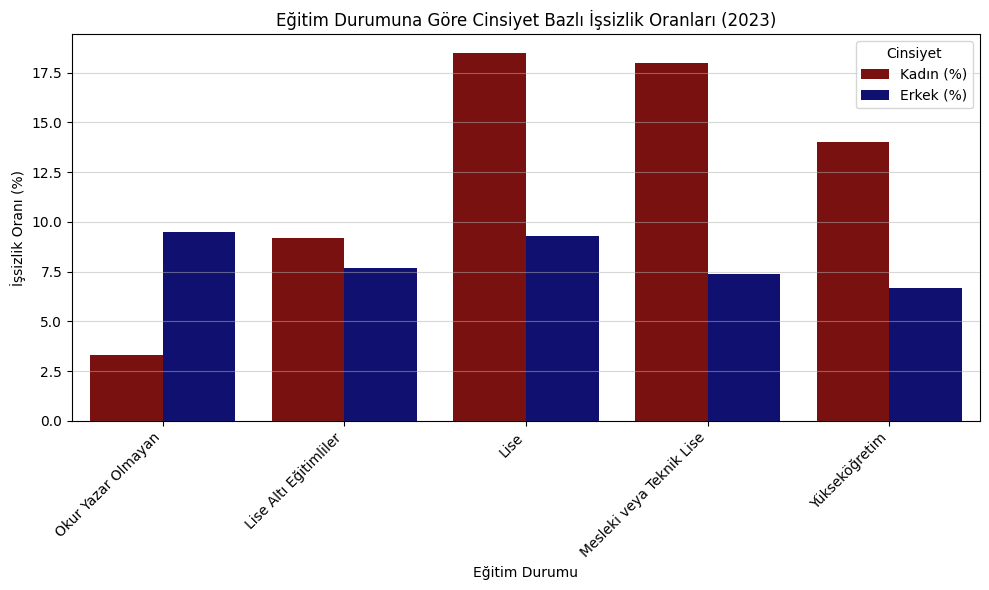

C:\Users\Beyza\AppData\Local\Temp\ipykernel_16544\1585444257.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_egitim.index, y='Fark (%) (Kadın - Erkek)', data=df_egitim, palette='viridis')


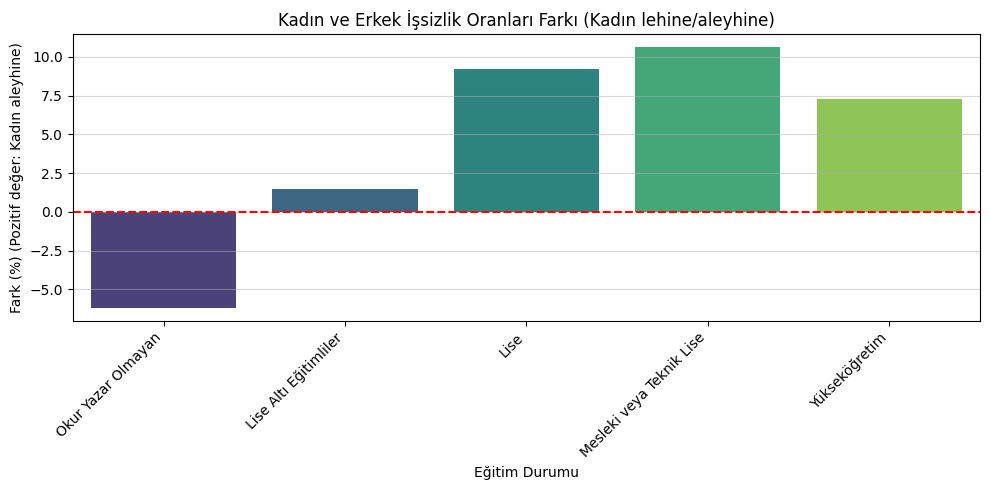

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri: Eğitim Durumuna Göre İşsizlik Oranları (15+ yaş, 2023) [cite: 3, 4]
data_egitim = {
    'Eğitim Durumu': [
        'Okur Yazar Olmayan',
        'Lise Altı Eğitimliler',
        'Lise',
        'Mesleki veya Teknik Lise',
        'Yükseköğretim'
    ],
    'Kadın (%)': [3.3, 9.2, 18.5, 18.0, 14.0],
    'Erkek (%)': [9.5, 7.7, 9.3, 7.4, 6.7]
}

df_egitim = pd.DataFrame(data_egitim)
df_egitim = df_egitim.set_index('Eğitim Durumu')

# 1. Temel İstatistikler (Kadın ve Erkek İşsizlik Oranları Ortalaması)
egitim_stats = df_egitim.describe().loc[['mean', 'std']]

# 2. Cinsiyet Farkı Hesaplanması (Kadın İşsizlik Oranı - Erkek İşsizlik Oranı)
df_egitim['Fark (%) (Kadın - Erkek)'] = df_egitim['Kadın (%)'] - df_egitim['Erkek (%)']

print("--- Eğitim Durumuna Göre İşsizlik Oranları Temel İstatistikleri ---")
print(egitim_stats)
print("\n--- Cinsiyetler Arası İşsizlik Oranı Farkı (Kadın - Erkek) ---")
print(df_egitim[['Kadın (%)', 'Erkek (%)', 'Fark (%) (Kadın - Erkek)']])


# 3. Çubuk Grafik Oluşturma (Boxplot yerine Fark Analizi görselleştirilmiştir)
plt.figure(figsize=(10, 6))

# Melt the DataFrame for easier plotting with Seaborn
df_melt = df_egitim.reset_index().melt(
    id_vars='Eğitim Durumu',
    value_vars=['Kadın (%)', 'Erkek (%)'],
    var_name='Cinsiyet',
    value_name='İşsizlik Oranı (%)'
)

sns.barplot(x='Eğitim Durumu', y='İşsizlik Oranı (%)', hue='Cinsiyet', data=df_melt, palette={'Kadın (%)': 'darkred', 'Erkek (%)': 'navy'})

plt.title('Eğitim Durumuna Göre Cinsiyet Bazlı İşsizlik Oranları (2023)')
plt.xlabel('Eğitim Durumu')
plt.ylabel('İşsizlik Oranı (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

# Fark (%) için ek bir görselleştirme
plt.figure(figsize=(10, 5))
sns.barplot(x=df_egitim.index, y='Fark (%) (Kadın - Erkek)', data=df_egitim, palette='viridis')
plt.title('Kadın ve Erkek İşsizlik Oranları Farkı (Kadın lehine/aleyhine)')
plt.xlabel('Eğitim Durumu')
plt.ylabel('Fark (%) (Pozitif değer: Kadın aleyhine)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='red', linestyle='--')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Grafik, kadın ve erkeklerin eğitim durumuna göre işsizlik oranlarını karşılaştırmalı
olarak sunmaktadır. Okur yazar olmayan ve lise mezunu kadınlarda işsizlik oranlarının
erkeklere göre daha yüksek olduğu görülmektedir.

Bu sonuçlar, eğitim düzeyi düşük gruplarda kadınların iş gücü piyasasında
daha kırılgan bir konumda olduğunu göstermektedir.


Grafik incelendiğinde, eğitim düzeyi yükseldikçe kadın ve erkek işsizlik oranları
arasındaki farkın belirginleştiği görülmektedir. Özellikle lise, mesleki/teknik lise
ve yükseköğretim mezunlarında kadınların işsizlik oranlarının erkeklere kıyasla
daha yüksek olduğu dikkat çekmektedir.

Bu durum, eğitim seviyesi artsa bile kadınların iş gücü piyasasında
eşit fırsatlara erişimde zorlandığını göstermektedir.


--- Karar Alma Mekanizmalarında Temsil Oranları Temel İstatistikleri ---
8 Farklı Pozisyonda Ortalama Kadın Temsil Oranı: 14.76%


C:\Users\Beyza\AppData\Local\Temp\ipykernel_16544\3920585888.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kadın Oranı (%)', y='Gösterge', data=df_temsil.sort_values(by='Kadın Oranı (%)', ascending=False), palette='magma')


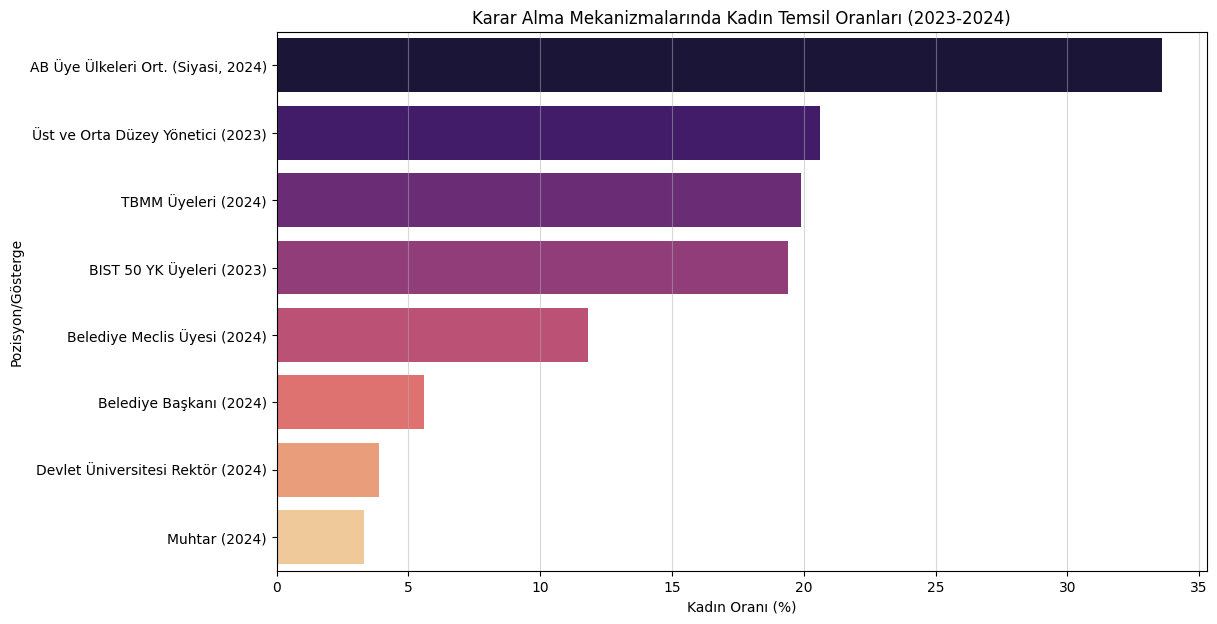

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Toplama: Çeşitli Kaynaklardan Kadın Temsil Oranları
data_temsil = {
    'Gösterge': [
        'TBMM Üyeleri (2024)',                 # 
        'AB Üye Ülkeleri Ort. (Siyasi, 2024)', # 
        'Belediye Başkanı (2024)',             # 
        'Belediye Meclis Üyesi (2024)',        # 
        'Muhtar (2024)',                       # 
        'Üst ve Orta Düzey Yönetici (2023)',   # [cite: 26]
        'BIST 50 YK Üyeleri (2023)',           # [cite: 27]
        'Devlet Üniversitesi Rektör (2024)'    # 
    ],
    'Kadın Oranı (%)': [
        19.9,  # 
        33.6,  # 
        5.6,   # 
        11.8,  # 
        3.3,   # 
        20.6,  # [cite: 26]
        19.4,  # [cite: 27]
        3.9    # 
    ]
}

df_temsil = pd.DataFrame(data_temsil)

# Temel İstatistikler (Ortalama Temsil)
mean_temsil = df_temsil['Kadın Oranı (%)'].mean()
print("--- Karar Alma Mekanizmalarında Temsil Oranları Temel İstatistikleri ---")
print(f"8 Farklı Pozisyonda Ortalama Kadın Temsil Oranı: {mean_temsil:.2f}%")

# Görselleştirme: Çubuk Grafik
plt.figure(figsize=(12, 7))
sns.barplot(x='Kadın Oranı (%)', y='Gösterge', data=df_temsil.sort_values(by='Kadın Oranı (%)', ascending=False), palette='magma')
plt.title('Karar Alma Mekanizmalarında Kadın Temsil Oranları (2023-2024)')
plt.xlabel('Kadın Oranı (%)')
plt.ylabel('Pozisyon/Gösterge')
plt.grid(axis='x', alpha=0.5)
plt.show()

Grafik, farklı karar alma ve yönetim pozisyonlarında kadın temsil oranlarını göstermektedir.
En düşük kadın temsili muhtarlık, rektörlük ve belediye başkanlığı gibi pozisyonlarda görülürken,
en yüksek oran Avrupa Birliği ülkeleri ortalamasında yer almaktadır.

Bu durum, Türkiye’de üst düzey karar alma mekanizmalarında
kadın temsiliyetinin yetersiz olduğunu ortaya koymaktadır.


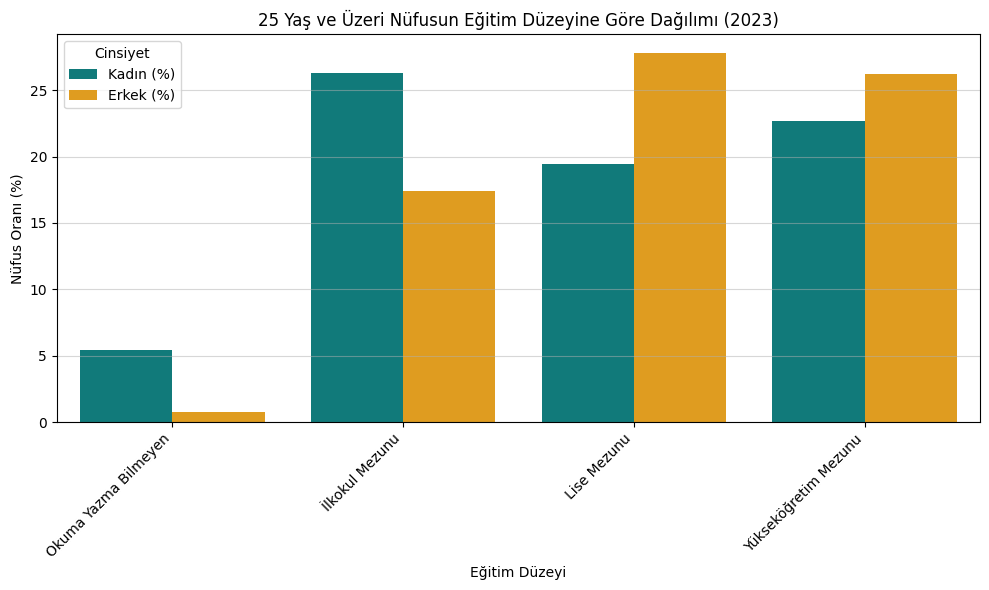

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri: 25 Yaş ve Üzeri Nüfusun Bitirilen Eğitim Düzeyine Göre Dağılımı (2023)
data_dagilim = {
    'Eğitim Düzeyi': [
        'Okuma Yazma Bilmeyen',
        'İlkokul Mezunu',
        'Lise Mezunu',
        'Yükseköğretim Mezunu',
    ],
    'Kadın (%)': [5.4, 26.3, 19.4, 22.7], # Seçilen 4 ana kategori 
    'Erkek (%)': [0.8, 17.4, 27.8, 26.2]  # Seçilen 4 ana kategori 
}

df_dagilim = pd.DataFrame(data_dagilim)
df_dagilim = df_dagilim.set_index('Eğitim Düzeyi')

# Veriyi görselleştirme için hazırlama
df_melt_dagilim = df_dagilim.reset_index().melt(
    id_vars='Eğitim Düzeyi',
    value_vars=['Kadın (%)', 'Erkek (%)'],
    var_name='Cinsiyet',
    value_name='Nüfus Oranı (%)'
)

# Görselleştirme: Çubuk Grafik
plt.figure(figsize=(10, 6))
sns.barplot(x='Eğitim Düzeyi', y='Nüfus Oranı (%)', hue='Cinsiyet', data=df_melt_dagilim, palette={'Kadın (%)': 'darkcyan', 'Erkek (%)': 'orange'})
plt.title('25 Yaş ve Üzeri Nüfusun Eğitim Düzeyine Göre Dağılımı (2023)')
plt.xlabel('Eğitim Düzeyi')
plt.ylabel('Nüfus Oranı (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

Grafik incelendiğinde, kadınların okuma yazma bilmeyen ve ilkokul mezunu gruplarda
erkeklere kıyasla daha yüksek oranda yer aldığı görülmektedir.
Buna karşın lise ve yükseköğretim mezunu gruplarda erkeklerin oranı daha yüksektir.

Bu bulgu, geçmişten gelen eğitim eşitsizliklerinin
günümüzdeki iş gücü ve toplumsal yapıyı etkilediğini göstermektedir.


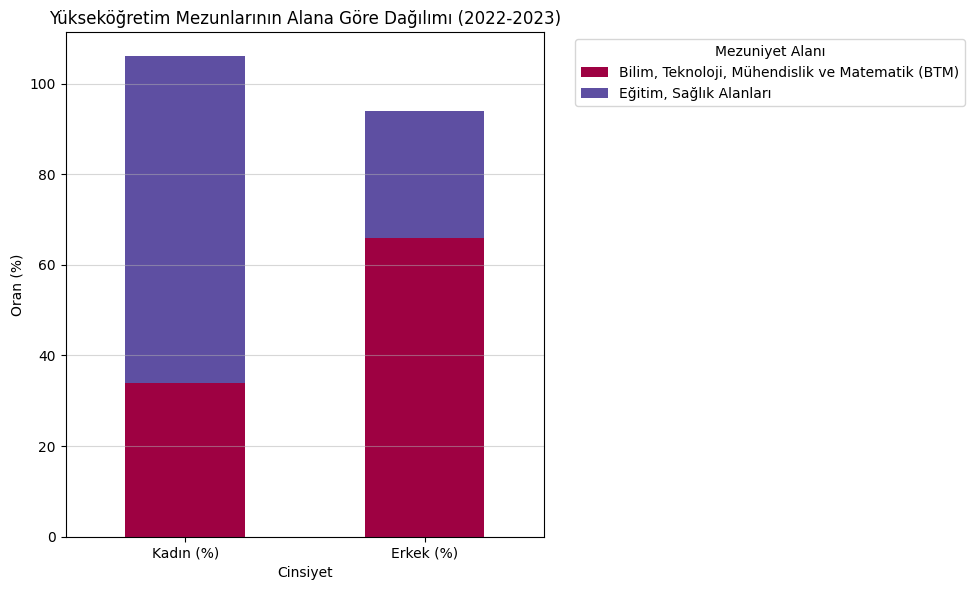

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri: Yükseköğretimden Mezuniyet Alanları (2022-2023)
data_alan = {
    'Alan': ['Bilim, Teknoloji, Mühendislik ve Matematik (BTM)', 'Eğitim, Sağlık Alanları'],
    'Kadın (%)': [34, 72], # 
    'Erkek (%)': [66, 28]  # 
}

df_alan = pd.DataFrame(data_alan)
df_alan = df_alan.set_index('Alan')

# Yığılmış Çubuk Grafik için veriyi transpoze etme (cinsiyetleri eksen yapmak için)
df_transposed = df_alan.T
df_transposed.index.name = 'Cinsiyet'

# Görselleştirme: Yığılmış Çubuk Grafik
plt.figure(figsize=(10, 6))
df_transposed.plot(kind='bar', stacked=True, colormap='Spectral', ax=plt.gca())

plt.title('Yükseköğretim Mezunlarının Alana Göre Dağılımı (2022-2023)')
plt.xlabel('Cinsiyet')
plt.ylabel('Oran (%)')
plt.xticks(rotation=0)
plt.legend(title='Mezuniyet Alanı', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Bu grafik, yükseköğretim mezunlarının cinsiyete göre alan dağılımını göstermektedir.
Kadınların eğitim ve sağlık alanlarında daha yoğun olduğu,
erkeklerin ise bilim, teknoloji, mühendislik ve matematik (BTM) alanlarında
daha yüksek oranda temsil edildiği görülmektedir.

Bu bulgu, yükseköğretimde alan bazlı cinsiyet ayrışmasının devam ettiğini
ortaya koymaktadır.


# MP5 – Raporlama

## Sonuçlar
Analiz sonuçları, kadın bilim insanlarının bilim dünyasında geri plana atıldığını göstermektedir.

## Öneriler
STEM alanlarında kadın katılımını artırmaya yönelik politikalar geliştirilmelidir.

## Kısıtlar
Veri seti sınırlı sayıda alanı kapsamaktadır.
